In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

# 1. Dataset

In [ ]:
# Cargamos el dataset desde el link
nba = pd.read_csv('/content/drive/MyDrive/Curso CPE Data Wrangling/Clases/datasets/estadisticas_nba.csv')

In [ ]:
nba.head(10)

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
129,Hamidou Diallo,SF,21,OKC,46,19.50,3.60,0.80,0.80,0.20,6.90
210,John Henson,C,29,TOT,40,15.00,4.10,1.40,0.60,1.10,5.50
370,Jaylen Nowell,SG,20,MIN,15,10.10,0.90,1.30,0.20,0.10,3.80
97,Zylan Cheatham,PF,24,NOP,4,12.80,2.30,0.80,0.30,0.30,3.00
409,Bobby Portis,PF,24,NYK,66,21.10,5.10,1.50,0.50,0.30,10.10
398,Gary Payton II,SF,27,WAS,29,14.90,2.80,1.70,1.10,0.20,3.90
314,Cody Martin,SF,24,CHO,48,18.80,3.30,2.00,0.80,0.20,5.00
223,Justin Holiday,SF,30,IND,73,25.00,3.30,1.30,1.20,0.60,8.30
497,Derrick Walton,PG,24,TOT,26,9.50,0.60,1.00,0.30,0.00,2.00
244,Jaren Jackson Jr.,C,20,MEM,57,28.50,4.60,1.40,0.70,1.60,17.40


El dataset contiene las siguientes variables:

* **player**: nombre del jugador
* **position**: posicion que juega el jugador
* **age**: edad
* **team_id**: equipo
* **g**: cantidad de partidos jugados
* **mp_per_g**: minutos por partido
* **trb_per_g**: rebotes por partido
* **ast_per_g**: asistencias por partido
* **stl_per_g**:robos por partido
* **blk_per_g**:tapas/bloqueos por partido
* **pts_per_g**:puntos por partido

Conozcamos la distribucion de las variables numericas del dataset

In [ ]:
nba.describe()

,age,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
count,529.00,529.00,529.00,529.00,529.00,529.00,529.00,529.00
mean,25.56,42.33,19.51,3.63,1.92,0.62,0.40,8.73
std,4.12,22.63,9.21,2.48,1.76,0.40,0.41,6.37
min,19.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,22.00,22.00,12.00,1.90,0.80,0.30,0.10,3.90
50%,25.00,48.00,18.90,3.20,1.40,0.60,0.30,7.00
75%,28.00,62.00,27.80,4.70,2.40,0.90,0.50,11.90
max,43.00,74.00,37.50,15.20,10.20,2.10,2.90,34.30


# 2. Discretización

Se nos solicita realizar un analisis de ciertas categorías de jugadores en base a las siguiente logica:

A) Para la edad: los jugadores de menos de 22 años son novatos, los que tienen entre 22 y 25 años son jovenes, los que tienen entre 25 y 33 años son adultos y los que tiene 33 años o más son veteranos

B) Para los puntos por partido dividirlos en 4 categorías de tal manera que aproximadamente el 25% de los jugadores quede en cada grupo 

C) Para la cantidad de partidos dividirlos en 3 grupos a intervalos regulares de partidos



## 2.1 Edad

Las categorías son:

* novato: hasta 22 años
* joven: desde 22 hasta 25 años
* adulto: desde 25 hasta 33 años
* veterano: desde 33 años

¿Qué función debemos usar? ¿Qué argumentos debemos definir?

In [ ]:
# Definimos los limites de los intervalos
bins_edad = [18, 22, 25, 33, np.inf]
# Lista de categorías
etiquetas_edad =  ['novato','joven', 'adulto', 'veterano']

In [ ]:
# Discretizamos la variable de edad
pd.cut(x=nba['age'],bins=bins_edad, labels=etiquetas_edad)

0        adulto
1        novato
2      veterano
3         joven
4        novato
         ...   
524      novato
525      adulto
526      adulto
527       joven
528      novato
Name: age, Length: 529, dtype: category
Categories (4, object): ['novato' < 'joven' < 'adulto' < 'veterano']

Ahora que ya tenemos nuestras categorías, podemos crear una nueva variable con la población discretizada

In [ ]:
# Creamos la nueva variable
nba['cat_edad'] = pd.cut(x=nba['age'],bins=bins_edad, labels=etiquetas_edad)

In [ ]:
# Observamos la nueva columna
nba.sample(10)

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g,cat_edad
434,D'Angelo Russell,PG,23,TOT,45,32.30,3.90,6.30,1.10,0.30,23.10,joven
255,Cameron Johnson,PF,23,PHO,57,22.00,3.30,1.20,0.60,0.40,8.80,joven
386,Kelly Oubre Jr.,SF,24,PHO,56,34.50,6.40,1.50,1.30,0.70,18.70,joven
183,Josh Gray,PG,26,NOP,2,11.50,1.00,1.00,0.00,0.00,1.00,adulto
31,Aron Baynes,C,33,PHO,42,22.20,5.60,1.60,0.20,0.50,11.50,adulto
357,Jamal Murray,PG,22,DEN,59,32.30,4.00,4.80,1.10,0.30,18.50,novato
528,Ivica Zubac,C,22,LAC,72,18.40,7.50,1.10,0.20,0.90,8.30,novato
280,Rodions Kurucs,PF,21,BRK,47,14.60,2.90,1.10,0.50,0.10,4.60,novato
175,Rudy Gobert,C,27,UTA,68,34.30,13.50,1.50,0.80,2.00,15.10,adulto
504,Quinndary Weatherspoon,SG,23,SAS,11,7.10,0.60,1.00,0.30,0.10,1.10,joven


## 2.2 Puntos por partido

Hay que dividirlos en 4 categorías de tal manera que aproximadamente el 25% de los jugadores quede en cada grupo

¿Qué función debemos usar? ¿Qué argumentos debemos definir?

In [ ]:
# Discretizamos la variable de puntos por partido
pd.qcut(x=nba['pts_per_g'], q=4)

0        (7.0, 11.9]
1       (11.9, 34.3]
2       (11.9, 34.3]
3      (-0.001, 3.9]
4         (3.9, 7.0]
           ...      
524     (11.9, 34.3]
525      (7.0, 11.9]
526    (-0.001, 3.9]
527       (3.9, 7.0]
528      (7.0, 11.9]
Name: pts_per_g, Length: 529, dtype: category
Categories (4, interval[float64]): [(-0.001, 3.9] < (3.9, 7.0] < (7.0, 11.9] < (11.9, 34.3]]

¿Qué observamos en estos intervalos?

La gran mayoría de los jugadores realizan pocos puntos por partido, un 75% de los jugadores realizan menos de 12 puntos por partido con un 50% haciendo hasta 7 puntos por partido

In [ ]:
# Definamos una lista de etiquetas para facilitar analisis posterior
etiquetas_puntos = ['muy_pocos_puntos', 'pocos_puntos', 'anotador_casual', 'goleador']

In [ ]:
# Creamos la nueva variable
nba['cat_puntos'] = pd.qcut(x=nba['pts_per_g'],q=4, labels=etiquetas_puntos)

In [ ]:
# Observemos nuestros datos
nba.sample(10)

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g,cat_edad,cat_puntos
335,Khris Middleton,SF,28,MIL,62,29.90,6.20,4.30,0.90,0.10,20.90,adulto,goleador
283,Jeremy Lamb,SG,27,IND,46,28.10,4.30,2.10,1.20,0.50,12.50,adulto,goleador
454,Dennis Smith Jr.,PG,22,NYK,34,15.80,2.30,2.90,0.80,0.20,5.50,novato,pocos_puntos
274,Brandon Knight,SG-PG,28,TOT,25,18.50,1.60,2.80,0.40,0.10,7.30,adulto,anotador_casual
352,Monte Morris,PG,24,DEN,73,22.40,1.90,3.50,0.80,0.20,9.00,joven,anotador_casual
128,Cheick Diallo,C,23,PHO,47,10.20,2.80,0.50,0.20,0.30,4.70,joven,pocos_puntos
22,Marvin Bagley III,C,20,SAC,13,25.70,7.50,0.80,0.50,0.90,14.20,novato,goleador
521,Delon Wright,PG,27,DAL,73,21.50,3.80,3.30,1.20,0.30,6.90,adulto,pocos_puntos
174,Shai Gilgeous-Alexander,SG,21,OKC,70,34.70,5.90,3.30,1.10,0.70,19.00,novato,goleador
466,Daniel Theis,C,27,BOS,65,24.10,6.60,1.70,0.60,1.30,9.20,adulto,anotador_casual


## 2.3 Cantidad de partidos

Hay que dividirlos en 3 grupos a intervalos regulares de partidos

¿Qué función debemos usar? ¿Qué argumentos debemos definir?

In [ ]:
# Discretizamos la variable de cantidad de partidos
pd.cut(x=nba['g'], bins=3)

0        (49.667, 74.0]
1        (49.667, 74.0]
2        (49.667, 74.0]
3       (0.927, 25.333]
4      (25.333, 49.667]
             ...       
524      (49.667, 74.0]
525      (49.667, 74.0]
526     (0.927, 25.333]
527     (0.927, 25.333]
528      (49.667, 74.0]
Name: g, Length: 529, dtype: category
Categories (3, interval[float64]): [(0.927, 25.333] < (25.333, 49.667] < (49.667, 74.0]]

¿Qué observamos en estos intervalos?

Cada intervalo se define por 25 partidos



In [ ]:
# Definamos una lista de etiquetas para facilitar analisis posterior
etiquetas_partidos = ['partidos_bajo', 'partidos_medio', 'partidos_alto']

In [ ]:
# Creamos la nueva variable
nba['cat_partidos'] = pd.cut(x=nba['g'],bins=3, labels=etiquetas_partidos)

In [ ]:
# Observemos nuestros datos
nba.sample(10)

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g,cat_edad,cat_puntos,cat_partidos
197,James Harden,SG,30,HOU,68,36.50,6.60,7.50,1.80,0.90,34.30,adulto,goleador,partidos_alto
136,Sekou Doumbouya,PF,19,DET,38,19.80,3.10,0.50,0.50,0.20,6.40,novato,pocos_puntos,partidos_medio
203,Tobias Harris,PF,27,PHI,72,34.30,6.90,3.20,0.70,0.60,19.60,adulto,goleador,partidos_alto
365,Malik Newman,SG,22,CLE,1,4.00,0.00,0.00,0.00,0.00,2.00,novato,muy_pocos_puntos,partidos_bajo
284,Romeo Langford,SG,20,BOS,32,11.60,1.30,0.40,0.30,0.30,2.50,novato,muy_pocos_puntos,partidos_medio
528,Ivica Zubac,C,22,LAC,72,18.40,7.50,1.10,0.20,0.90,8.30,novato,anotador_casual,partidos_alto
305,Daryl Macon,PG,24,MIA,4,3.50,0.00,0.30,0.00,0.00,0.80,joven,muy_pocos_puntos,partidos_bajo
250,Amile Jefferson,PF,26,ORL,18,4.10,1.30,0.20,0.10,0.20,0.80,adulto,muy_pocos_puntos,partidos_bajo
193,Devon Hall,PG,24,OKC,11,7.40,0.60,1.20,0.40,0.10,1.80,joven,muy_pocos_puntos,partidos_bajo
255,Cameron Johnson,PF,23,PHO,57,22.00,3.30,1.20,0.60,0.40,8.80,joven,anotador_casual,partidos_alto


# 3 Análisis de los datos

Ahora que tenemos las variables con las categorías necesarias necesitamos hacer algunos analisis para responder a ciertas preguntas

### ¿Cuántos jugadores hay en cada posición?

In [ ]:
nba.groupby('position').size().sort_values(ascending=False)

position
SG       118
C        107
PF       105
PG        91
SF        89
PF-C       5
SF-PF      3
PF-SF      3
SG-PG      2
SF-SG      2
SG-SF      1
SF-C       1
PG-SG      1
C-PF       1
dtype: int64

### ¿Cuántos jugadores hay en cada categoría de edad? ¿Y en cada categoría de partidos jugados?

In [ ]:
nba.groupby('cat_edad').size()

cat_edad
novato      142
joven       152
adulto      211
veterano     24
dtype: int64

In [ ]:
nba.groupby(['cat_partidos']).size()

cat_partidos
partidos_bajo     148
partidos_medio    122
partidos_alto     259
dtype: int64

### ¿Cuántos jugadores hay en cada grupo conformado por la categoría de edad y de puntos?

In [ ]:
nba.groupby(['cat_edad', 'cat_puntos']).size()

cat_edad  cat_puntos      
novato    muy_pocos_puntos    47
          pocos_puntos        37
          anotador_casual     31
          goleador            27
joven     muy_pocos_puntos    47
          pocos_puntos        37
          anotador_casual     32
          goleador            36
adulto    muy_pocos_puntos    33
          pocos_puntos        51
          anotador_casual     64
          goleador            63
veterano  muy_pocos_puntos     7
          pocos_puntos         7
          anotador_casual      5
          goleador             5
dtype: int64

## Opcionales

### Observemos graficamente la cantidad de jugadores por categoria de edad y de puntos

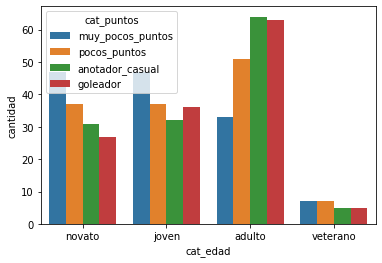

In [ ]:
# Graficamos
cantidad_edad_puntos = nba.groupby(['cat_edad', 'cat_puntos']).agg(cantidad=('player', 'count')).reset_index()
sns.barplot(x='cat_edad', y='cantidad', hue='cat_puntos', data=cantidad_edad_puntos)

### Evaluar cómo quedan los intervalos de puntos por partido si creamos los intervalos con el criterio de igual ancho 

¿Difieren mucho de los creados con el criterio anterior?

In [ ]:
# Discretizamos la variable de puntos por partido
pd.cut(x=nba['pts_per_g'], bins=4)

0        (8.575, 17.15]
1        (8.575, 17.15]
2       (17.15, 25.725]
3      (-0.0343, 8.575]
4      (-0.0343, 8.575]
             ...       
524      (25.725, 34.3]
525      (8.575, 17.15]
526    (-0.0343, 8.575]
527    (-0.0343, 8.575]
528    (-0.0343, 8.575]
Name: pts_per_g, Length: 529, dtype: category
Categories (4, interval[float64]): [(-0.0343, 8.575] < (8.575, 17.15] < (17.15, 25.725] <
                                    (25.725, 34.3]]

Vemos que los intervalos se separan cada 8.5 puntos aproximadamente

### Evaluar cómo quedan los intervalos de puntos por partido si creamos los intervalos creando un histograma utilizando los métodos de sturges y de la raiz cuadrada 

¿Difieren mucho de los creados con el criterio anterior?


In [ ]:
np.histogram(a=nba['pts_per_g'], bins='sturges')

(array([100, 130, 108,  75,  40,  29,  24,   9,   8,   5,   1]),
 array([ 0.        ,  3.11818182,  6.23636364,  9.35454545, 12.47272727,
        15.59090909, 18.70909091, 21.82727273, 24.94545455, 28.06363636,
        31.18181818, 34.3       ]))

In [ ]:
np.histogram(a=nba['pts_per_g'], bins='sqrt')

(array([32, 57, 59, 71, 64, 39, 42, 34, 24, 19, 19, 10, 17, 14,  7,  6,  2,
         4,  3,  3,  2,  0,  1]),
 array([ 0.        ,  1.49130435,  2.9826087 ,  4.47391304,  5.96521739,
         7.45652174,  8.94782609, 10.43913043, 11.93043478, 13.42173913,
        14.91304348, 16.40434783, 17.89565217, 19.38695652, 20.87826087,
        22.36956522, 23.86086957, 25.35217391, 26.84347826, 28.33478261,
        29.82608696, 31.3173913 , 32.80869565, 34.3       ]))

Ambos métodos construyen una cantidad de intervalos mucho más grande que la que habíamos propuesto originalmente nosotros